In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone, timedelta

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid",
              context="notebook",
            #   font_scale=1.5
              )

In [5]:
# combine train and test data to get the full dataset
train = pd.read_csv(r'data\processed datasets\retailrocket\events_train.csv',
                                  sep='\t')

test = pd.read_csv(r'data\processed datasets\retailrocket\events_test.csv',
                                  sep='\t')

retailrocket = pd.concat([train, test])
retailrocket.head()

,Time,UserId,Type,ItemId,SessionId
0,1438969904,2,view,325215,3
1,1438970013,2,view,325215,3
2,1438970212,2,view,259884,3
3,1438970468,2,view,216305,3
4,1438970905,2,view,342816,3


In [6]:
# convert timestamp to datetime
retailrocket['Time'] = pd.to_datetime(retailrocket['Time'], unit='s')

display(retailrocket.head())
display(retailrocket.shape)

,Time,UserId,Type,ItemId,SessionId
0,2015-08-07 17:51:44,2,view,325215,3
1,2015-08-07 17:53:33,2,view,325215,3
2,2015-08-07 17:56:52,2,view,259884,3
3,2015-08-07 18:01:08,2,view,216305,3
4,2015-08-07 18:08:25,2,view,342816,3


(1120601, 5)

In [7]:
# what type of events are there in the dataset?
print(f"Unique event types in retailrocket dataset: {retailrocket['Type'].unique()}")

Unique event types in retailrocket dataset: ['view' 'addtocart' 'transaction']


# Exploratory Data Analysis

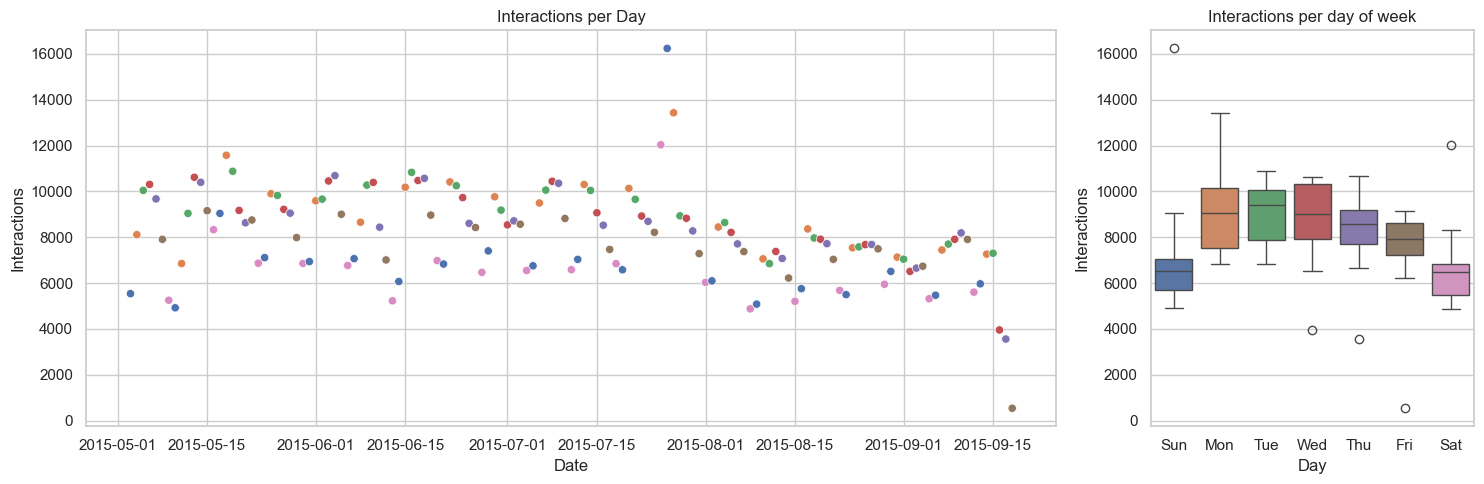

In [8]:
# how many events are there per day?
events_per_day = retailrocket.groupby([retailrocket['Time'].dt.date.rename('Date'), retailrocket['Time'].dt.day_name().rename('Day')]).size().reset_index(name='Interactions')

# abbreviate the day names for better readability
events_per_day['Day'] = events_per_day['Day'].map({'Monday': 'Mon', 'Tuesday': 'Tue', 'Wednesday': 'Wed', 'Thursday': 'Thu', 'Friday': 'Fri', 'Saturday': 'Sat', 'Sunday': 'Sun'})


fig, axes = plt.subplots(1, 2, 
                         width_ratios=[3, 1],
                         figsize=(15, 5)
                         )

# Scatterplot
sns.scatterplot(data=events_per_day,
                x='Date',
                y='Interactions',
                hue='Day',
                ax=axes[0])

# Set the title and labels for the scatterplot
axes[0].set_title('Interactions per Day')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Interactions')
# hide the legend
axes[0].get_legend().remove()

# Boxplot
sns.boxplot(data=events_per_day,
            x='Day',
            y='Interactions',
            hue='Day',
            ax=axes[1])

# Set the title and labels for the boxplot
axes[1].set_title('Interactions per day of week')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Interactions')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

The plot above shows that the number of interactions per day is relatively constant. Retailrocket has a lot of interactions during the week and less during the weekend. Mondays, Tuesdays and Wednesdays are the busiest days, while Saturdays and Sundays are the quietest.

How many cold start sessions are there in the dataset?  
Lets create a histogram with the frequency of the length of the sessions.

Text(3.843331095696278, 12000, 'Mean = 3.34')

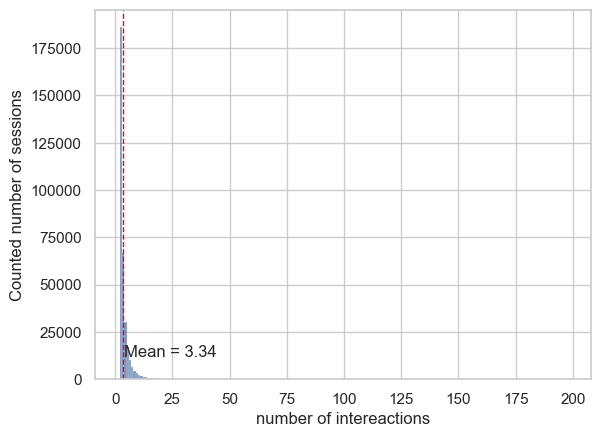

In [9]:
data_per_session = retailrocket.groupby('SessionId').size().reset_index(name='number of intereactions')

sns.histplot(data_per_session['number of intereactions'], binwidth=1)
plt.ylabel('Counted number of sessions')

# add a line for the mean
plt.axvline(data_per_session['number of intereactions'].mean(), color='red', linestyle='dashed', linewidth=1)
# print the mean
plt.text(data_per_session['number of intereactions'].mean() + 0.5, 12000, 'Mean = {:.2f}'.format(data_per_session['number of intereactions'].mean()))

On average, 3.34 interactions are made per session. This is a verry low number. Moreover, looking at the distribution, there are a lot of sessions with only two interactions. This indicates that there are a lot of cold start sessions in the dataset. We can also zoom in on the distribution of the number of interactions per session and limit the x-axis to 25.

Text(3.843331095696278, 12000, 'Mean = 3.34')

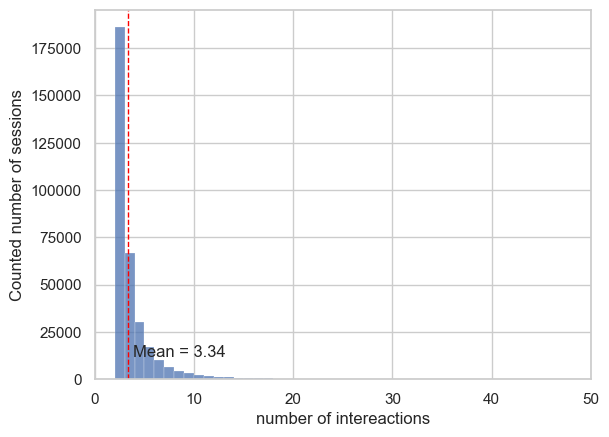

In [10]:
sns.histplot(data_per_session['number of intereactions'], binwidth=1)
plt.ylabel('Counted number of sessions')
# limit the x-axis to 25
plt.xlim(0, 50)

# add a line for the mean
plt.axvline(data_per_session['number of intereactions'].mean(), color='red', linestyle='dashed', linewidth=1)
# print the mean
plt.text(data_per_session['number of intereactions'].mean() + 0.5, 12000, 'Mean = {:.2f}'.format(data_per_session['number of intereactions'].mean()))

Now that we zoomed in by limiting the x axis to 50 interactions, we can see that the distribution is heavily right-skewed. The majority of the sessions have less than 10 interactions. This is a clear indication that there are a lot of cold start sessions in the dataset.  

Lets now focus on the items, and see how many interactions each item has. We can create a histogram with the frequency of the number of interactions per item.
Does one item dominate the dataset? Or are the interactions spread out over the items?

'top 10 most popular items:'

,ItemId,number of intereactions
74577,461686,1725
41553,257040,1222
35399,219512,1134
50036,309778,1084
62142,384302,1036
51653,320130,923
1538,9877,890
37865,234255,796
30600,190000,777
39055,241555,775


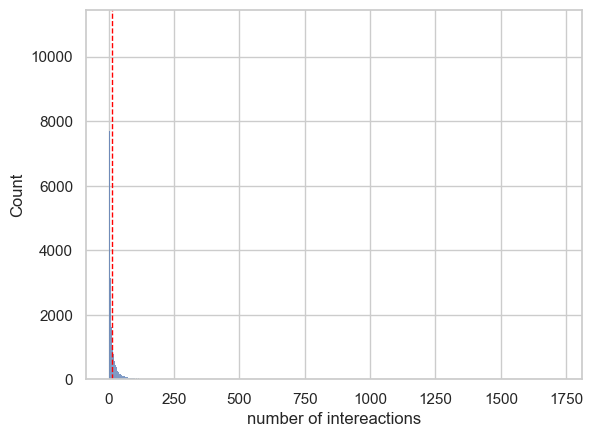

In [11]:
data_per_item = retailrocket.groupby('ItemId').size().reset_index(name='number of intereactions').sort_values('number of intereactions', ascending=False)
sns.histplot(data_per_item['number of intereactions'], binwidth=1)

# add a line for the mean
plt.axvline(data_per_item['number of intereactions'].mean(), color='red', linestyle='dashed', linewidth=1)

display('top 10 most popular items:')
display(data_per_item.head(10))

In the above histogram and top 10 table, we can see that some items are very popular and have been interacted with many times, while most items have been interacted with only a few times. This is a typical characteristic of e-commerce datasets. And the cold item start is visible in the histogram.

Lets zoom in on the distribution of the number of interactions per item and limit the x-axis to 100.

(0.0, 100.0)

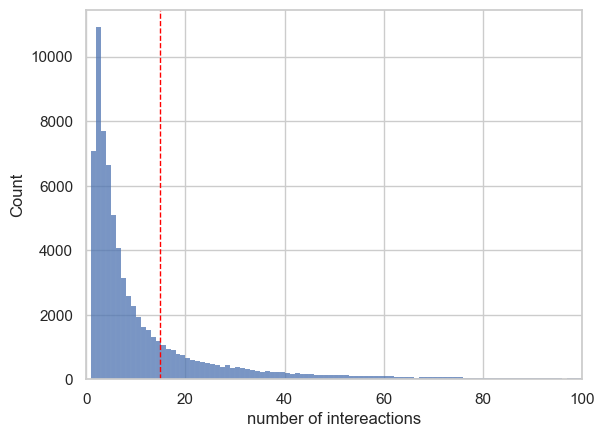

In [12]:
data_per_item = retailrocket.groupby('ItemId').size().reset_index(name='number of intereactions').sort_values('number of intereactions', ascending=False)
sns.histplot(data_per_item['number of intereactions'], binwidth=1)

# add a line for the mean
plt.axvline(data_per_item['number of intereactions'].mean(), color='red', linestyle='dashed', linewidth=1)


# limit the x-axis to 100
plt.xlim(0, 100)

This plot shows that the distribution of the number of interactions per item is heavily right-skewed. The majority of the items have less than 20 interactions. This is a clear indication that there are a lot of cold start items in the dataset.

Lets now analyse the time element, do items get to be interacted with more as time goes on? And how are the interactions distributed over time?

In [13]:
# create a dataframe where we track the first and last time an item was interacted with by taking the min and max of the Time column for each item. also count the number of interactions per item
data_per_item = retailrocket.groupby('ItemId').agg({'Time': ['min', 'max', 'count']}).reset_index()

# compute the time between the first and last interaction for each item
data_per_item['time between first and last interaction'] = data_per_item['Time']['max'] - data_per_item['Time']['min']
data_per_item


ItemId                Time                            \
                              min                 max count   
0           6 2015-05-06 20:33:13 2015-08-06 18:56:05    10   
1          15 2015-05-28 20:21:23 2015-07-16 15:50:43    11   
2          16 2015-05-12 02:12:50 2015-08-11 17:21:48     9   
3          19 2015-06-29 20:19:41 2015-09-07 04:24:42     5   
4          25 2015-05-12 16:43:15 2015-09-12 23:38:42    39   
...       ...                 ...                 ...   ...   
75384  466847 2015-05-11 00:06:46 2015-09-13 16:37:17    19   
75385  466858 2015-07-19 21:53:56 2015-08-11 02:51:08     2   
75386  466860 2015-06-16 13:53:00 2015-06-16 13:53:00     1   
75387  466861 2015-05-12 04:10:10 2015-09-17 13:40:29    63   
75388  466864 2015-05-04 00:03:57 2015-08-11 07:53:28    47   

      time between first and last interaction  
                                               
0                            91 days 22:22:52  
1                            48 days 19:29:20  
2                            91 days 15:08:58  
3                            69 days 08:05:01  
4                           123 days 06:55:27  
...                                       ...  
75384                       125 days 16:30:31  
75385                        22 days 04:57:12  
75386                         0 days 00:00:00  
75387                       128 days 09:30:19  
75388                        99 days 07:49:31  

[75389 rows x 5 columns]

<Axes: xlabel='time between first and last interaction', ylabel='Count'>

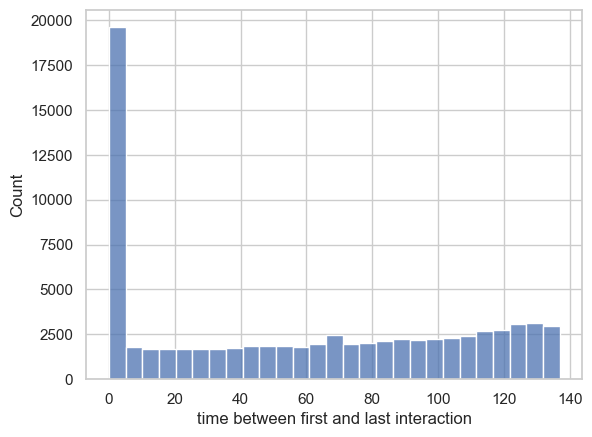

In [14]:
# create a boxplot of the distribution of the time between the first and last interaction for each item
sns.histplot(x=data_per_item['time between first and last interaction'].dt.days, binwidth=5) 

The above histogram shows that most of the products are interected with up to almost 140 days. Moreover, most of the products only have a few interactions, indicating that there are a lot of cold start items in the dataset. Interestingly, the number of interactions per product is relatively constant and only grows slightly as time goes on. This suggests that the popularity of the products is relatively constant over time as it does not increase significantly.

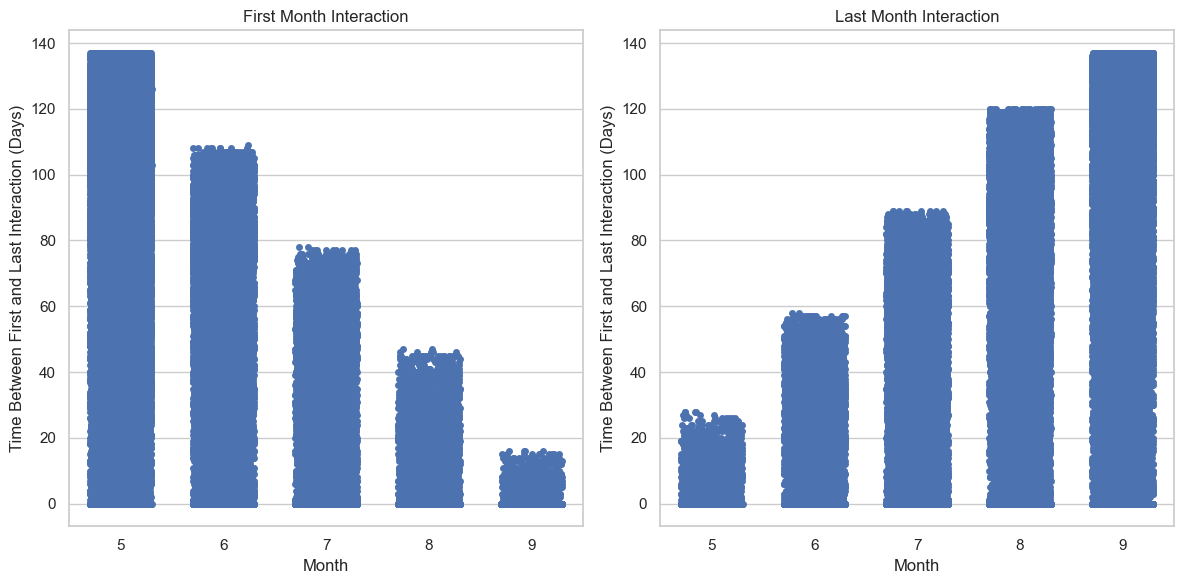

In [15]:
data_per_item['First month interaction'] = data_per_item['Time']['min'].dt.month
data_per_item['Last month interaction'] = data_per_item['Time']['max'].dt.month

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first strip plot on the first subplot
sns.stripplot(x=data_per_item['First month interaction'], 
              y=data_per_item['time between first and last interaction'].dt.days,
              jitter=0.3,
              ax=axes[0])

# Set the title and labels for the first subplot
axes[0].set_title('First Month Interaction')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Time Between First and Last Interaction (Days)')

# Plot the second strip plot on the second subplot
sns.stripplot(x=data_per_item['Last month interaction'], 
              y=data_per_item['time between first and last interaction'].dt.days,
              jitter=0.3,
              ax=axes[1])

# Set the title and labels for the second subplot
axes[1].set_title('Last Month Interaction')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Time Between First and Last Interaction (Days)')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Please check the same visualisation in `0. preprocessing Diginetica & EDA.ipynb`. Both visualisations are completely opposite. It indicates that the Retailrocket dataset is a session-based dataset where random sessions have been sampled and not items from May and June (as in Diginetica). This is also the reason why the time between the first and last interaction of items does not change much as time incraeses.

This is also the reason why this plot above, has data points between 0 and 120 in May and Diginetica has only data points around 125.